EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-1024,Sketch:128*256
Execution time: 255.271 seconds.
Precision:  0.904
Top_dict with 138688 bytes.
Sketch with 131200 bytes.
Sk_head with 35416 bytes.
hyperloglog with 4816 bytes.
Total size 302.8515625 kbytes, 
Find:926
Top_ARE: 0.0270
Top_AAE: 173.2635
Estimate time:  0.398 seconds.


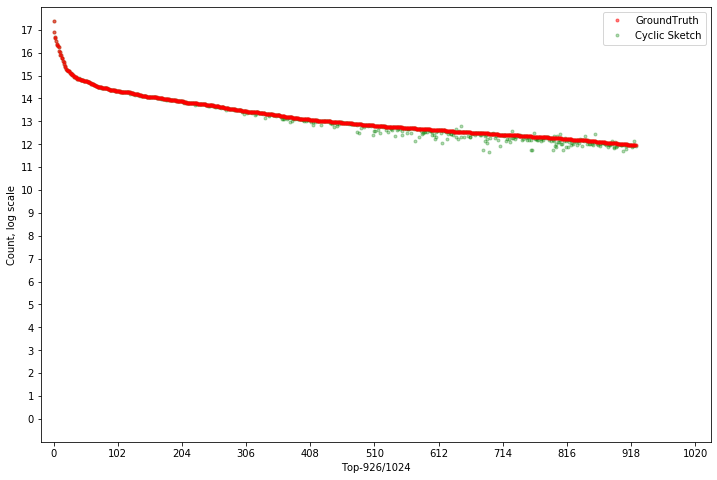

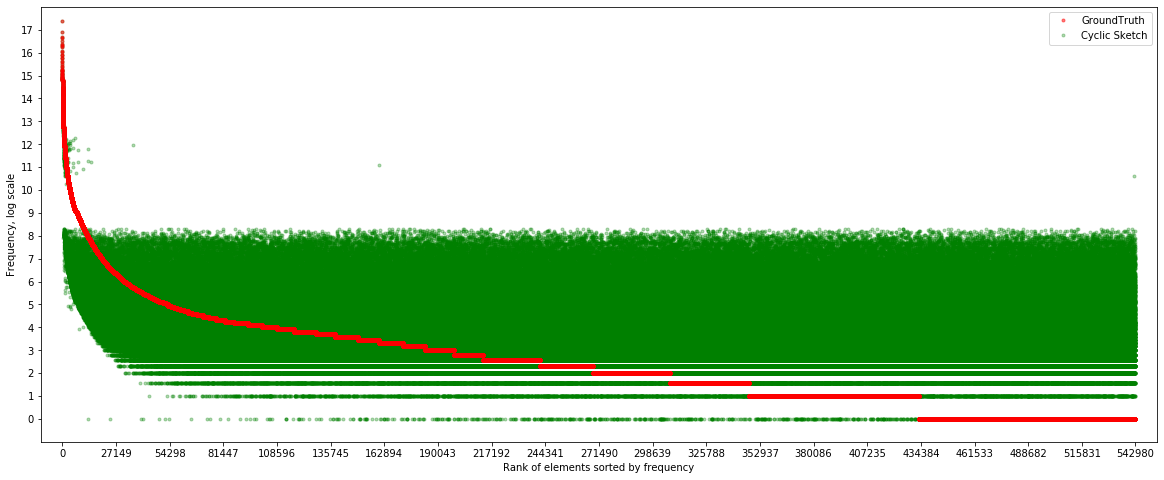

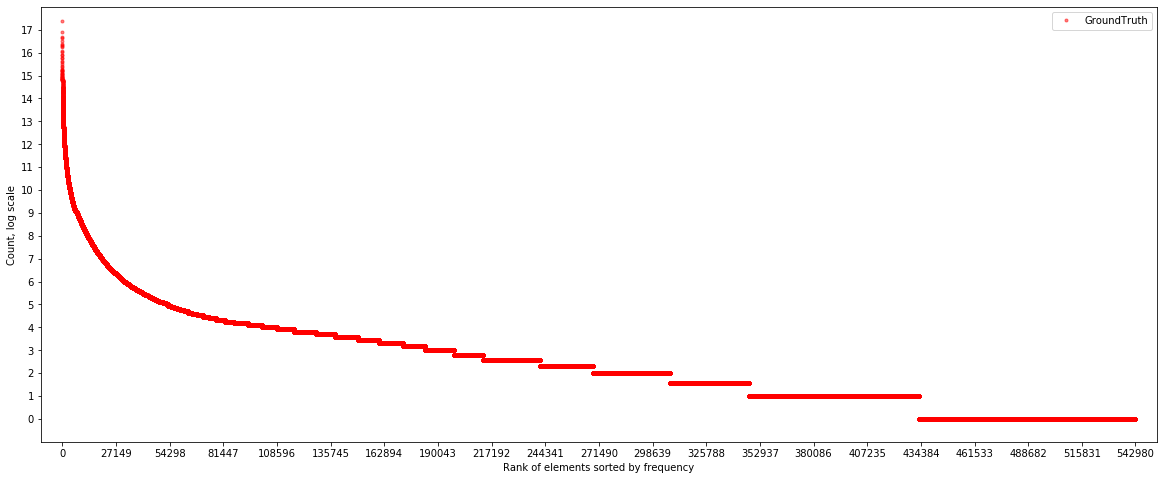

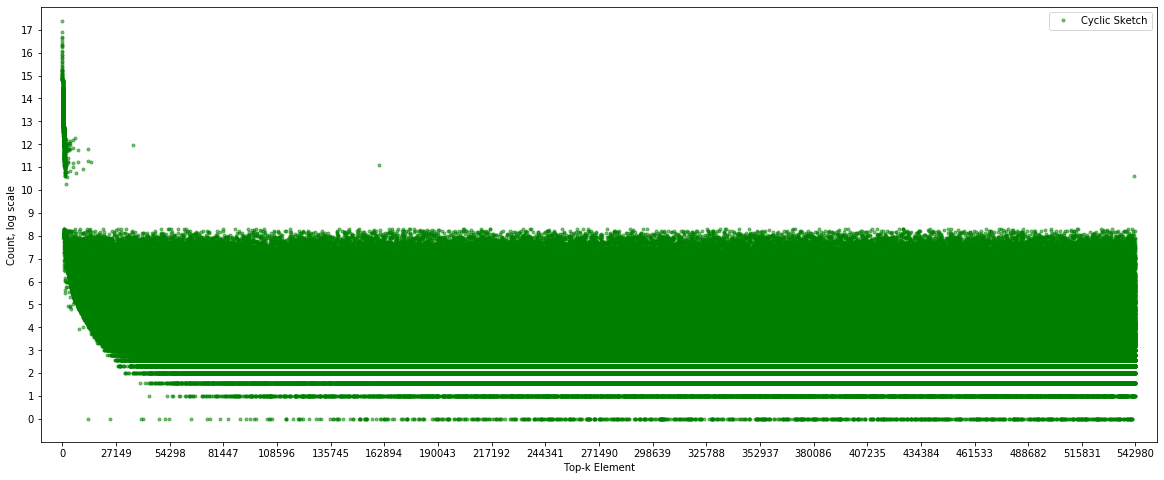

In [1]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-1280,Sketch:128*256
Execution time: 239.720 seconds.
Precision:  0.954
Top_dict with 164136 bytes.
Sketch with 131200 bytes.
Sk_head with 35136 bytes.
hyperloglog with 4816 bytes.
Total size 327.4296875 kbytes, 
Find:977
Top_ARE: 0.0220
Top_AAE: 139.2160
Estimate time:  0.400 seconds.


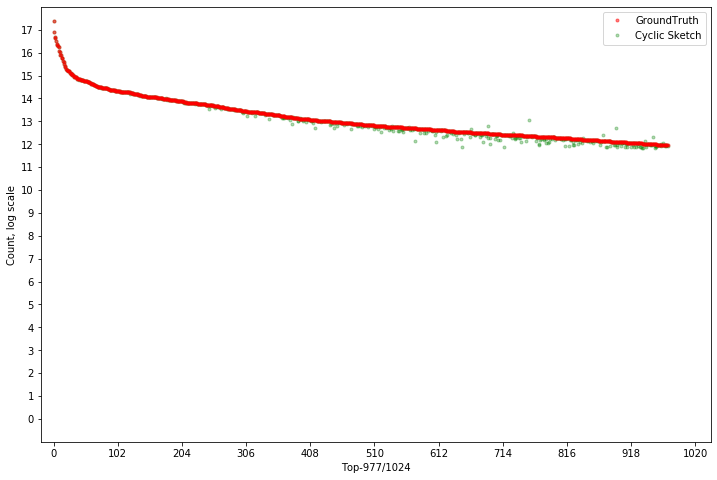

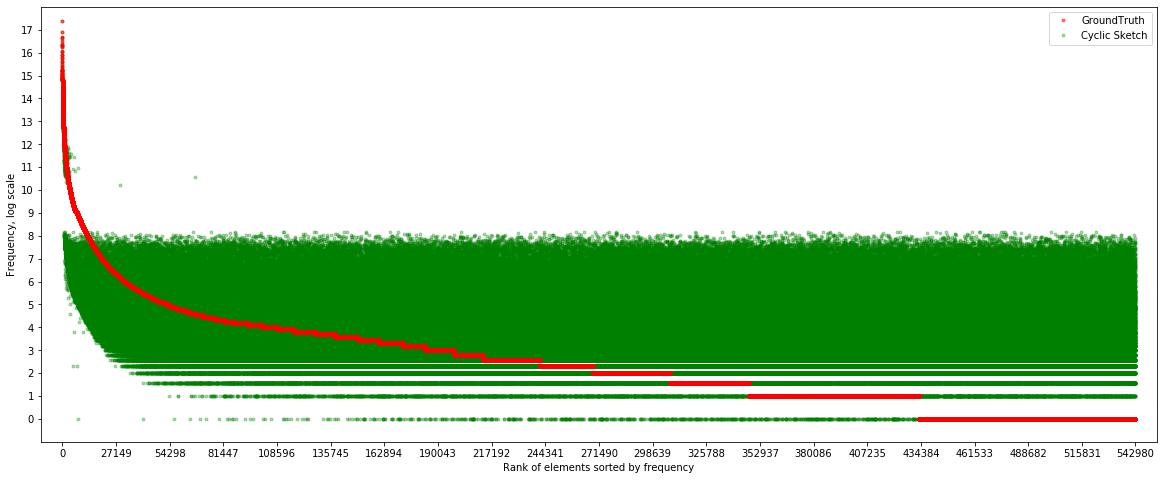

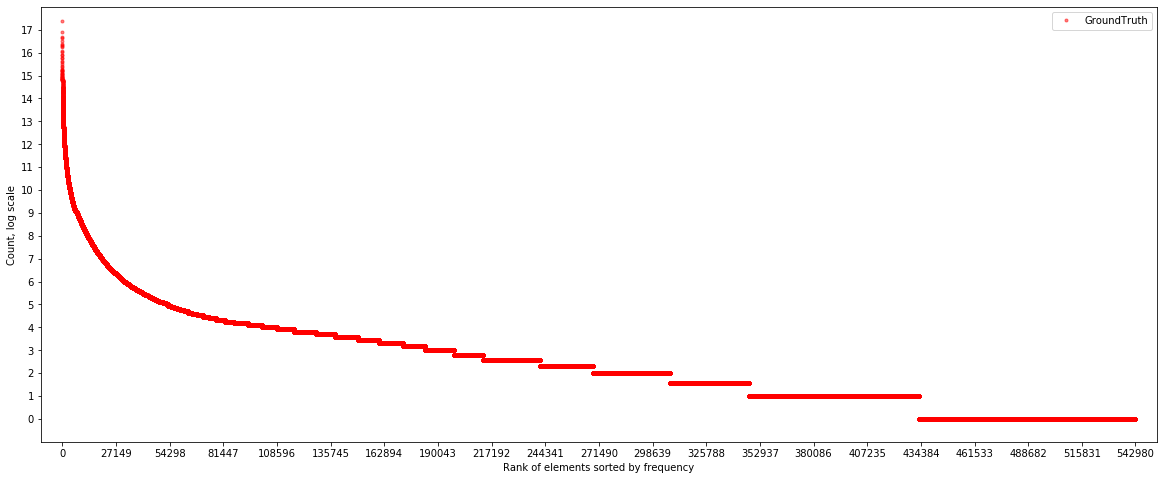

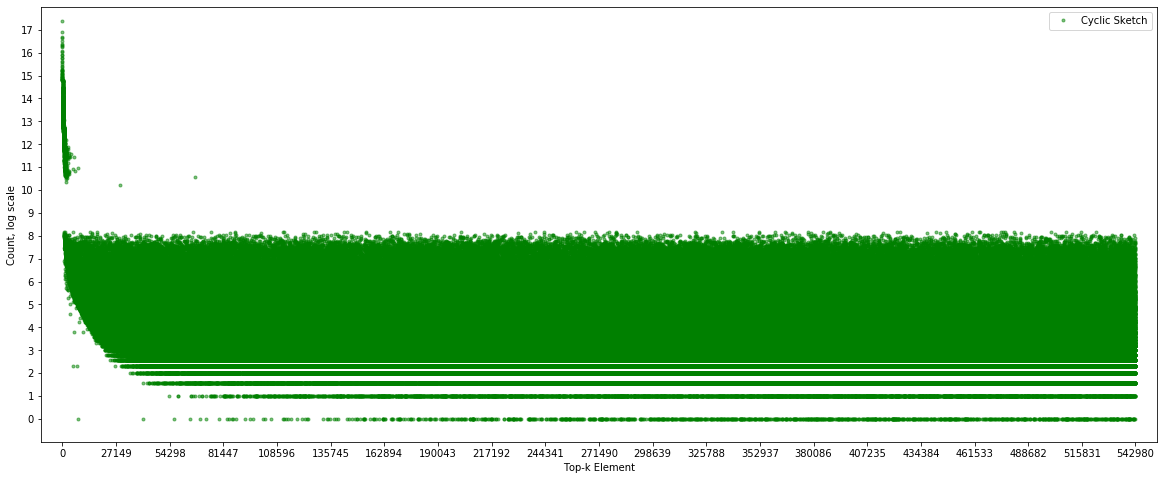

In [2]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=1280
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-2048,Sketch:128*256
Execution time: 216.121 seconds.
Precision:  0.974
Top_dict with 277144 bytes.
Sketch with 131200 bytes.
Sk_head with 34656 bytes.
hyperloglog with 4848 bytes.
Total size 437.3515625 kbytes, 
Find:997
Top_ARE: 0.0125
Top_AAE: 79.2698
Estimate time:  0.383 seconds.


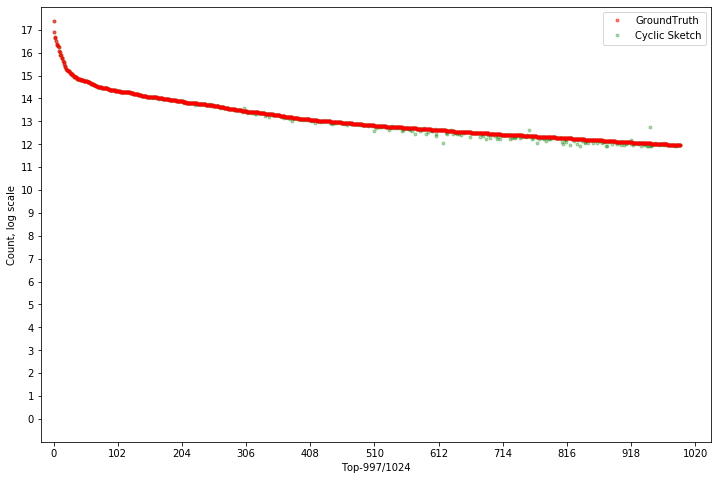

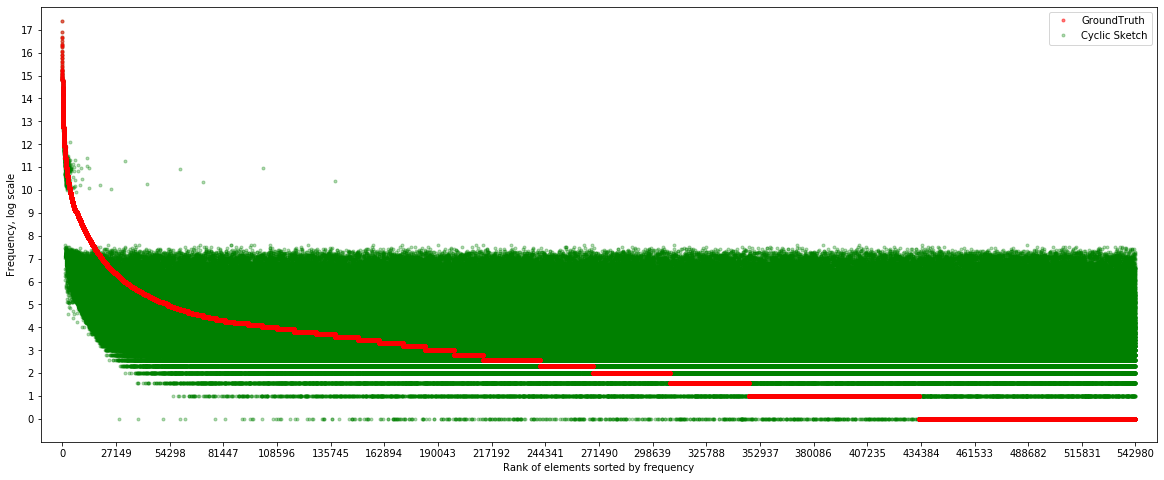

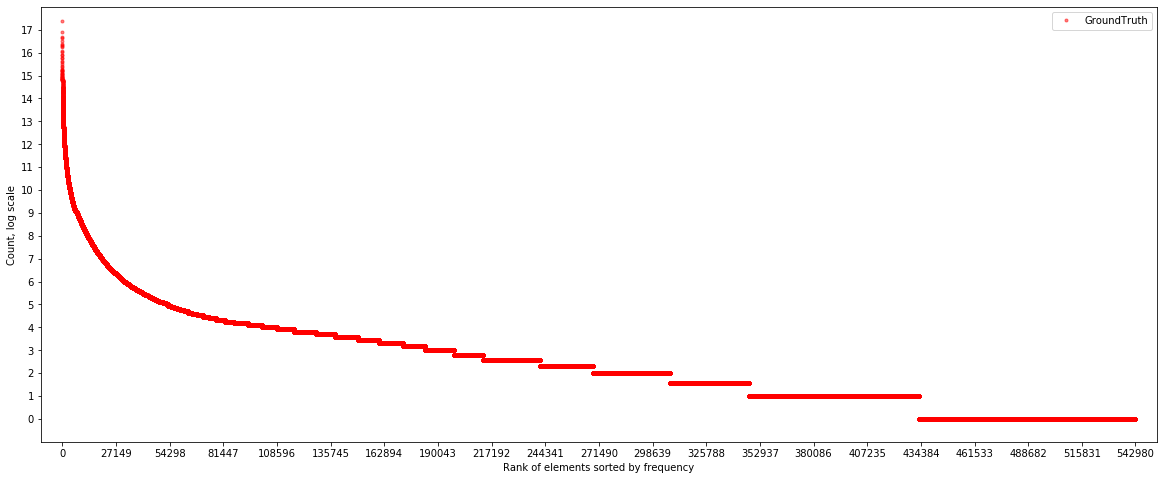

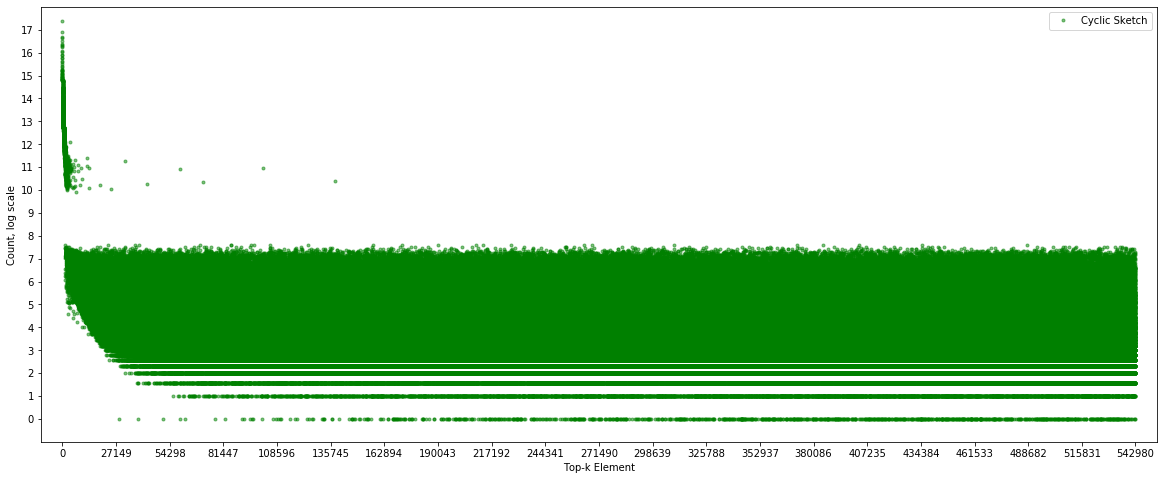

In [3]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=2048
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-2816,Sketch:128*256
Execution time: 202.216 seconds.
Precision:  0.983
Top_dict with 427144 bytes.
Sketch with 131200 bytes.
Sk_head with 34704 bytes.
hyperloglog with 4848 bytes.
Total size 583.8828125 kbytes, 
Find:1007
Top_ARE: 0.0083
Top_AAE: 52.8123
Estimate time:  0.384 seconds.


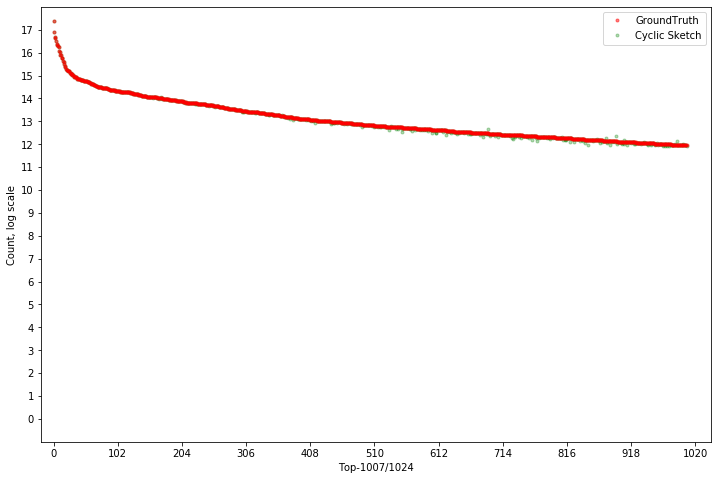

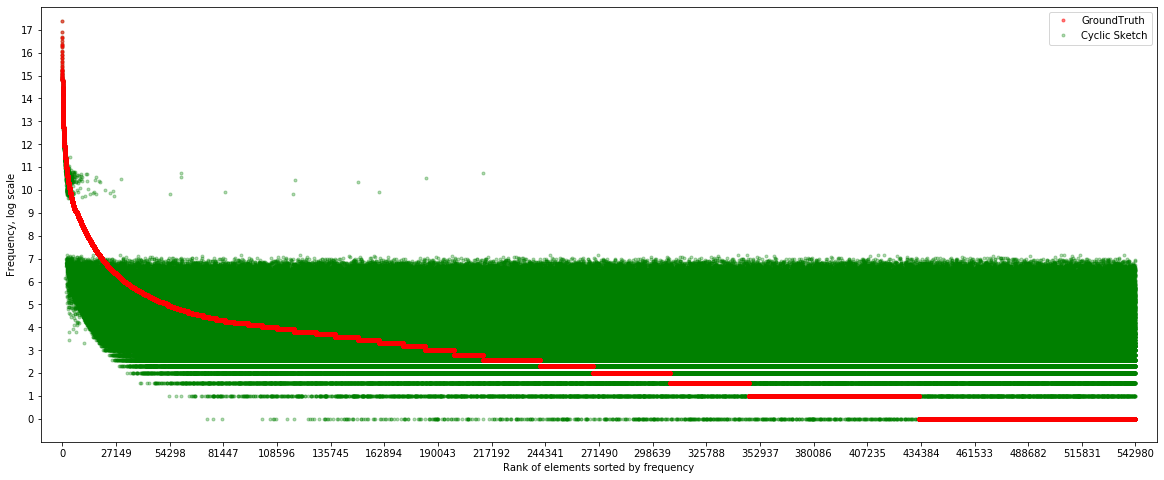

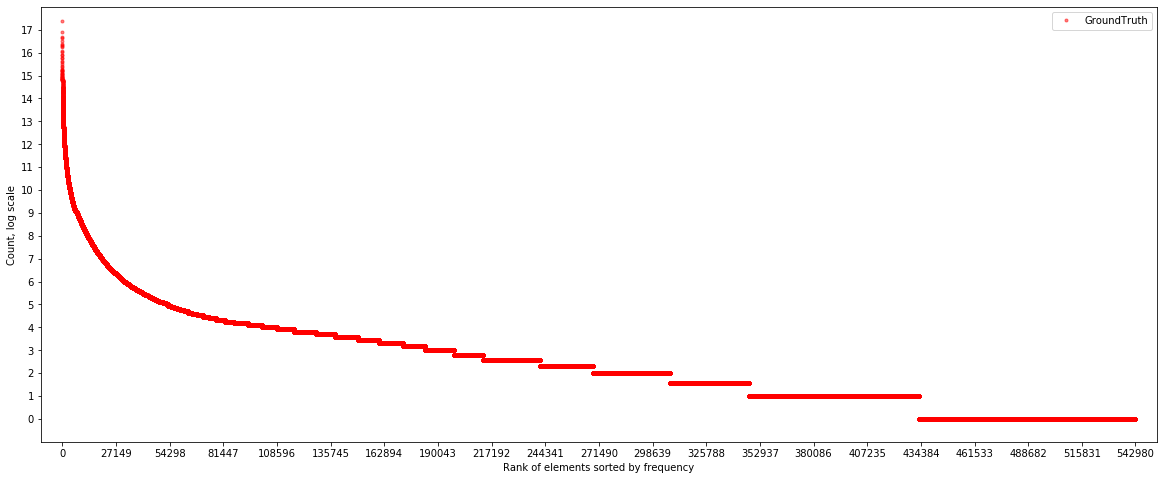

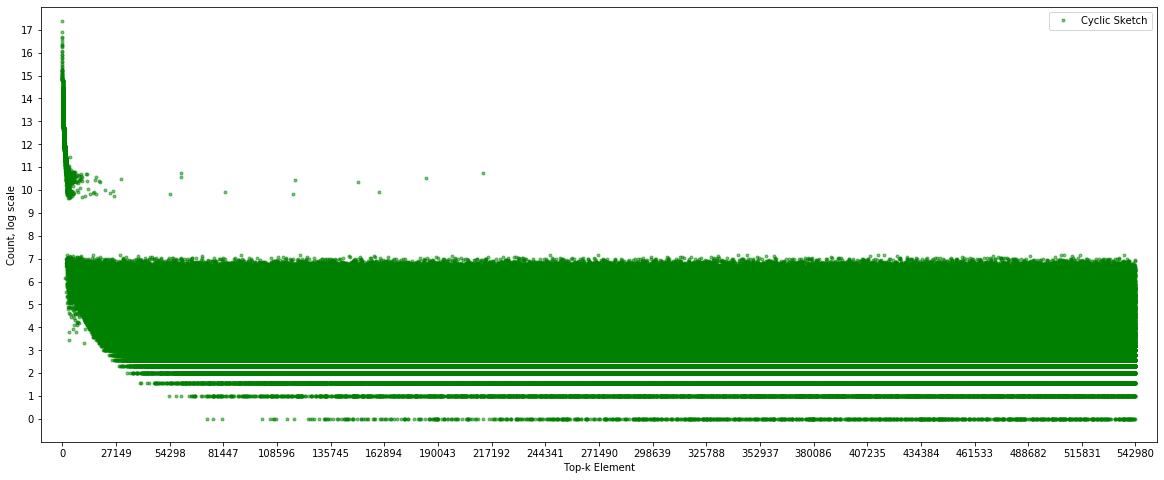

In [4]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=2816
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-3584,Sketch:128*256
Execution time: 193.147 seconds.
Precision:  0.985
Top_dict with 503408 bytes.
Sketch with 131200 bytes.
Sk_head with 34256 bytes.
hyperloglog with 4848 bytes.
Total size 657.921875 kbytes, 
Find:1009
Top_ARE: 0.0055
Top_AAE: 36.0218
Estimate time:  0.387 seconds.


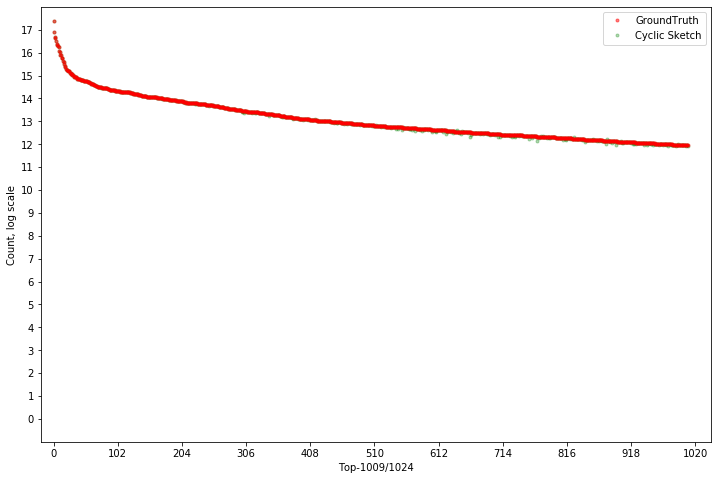

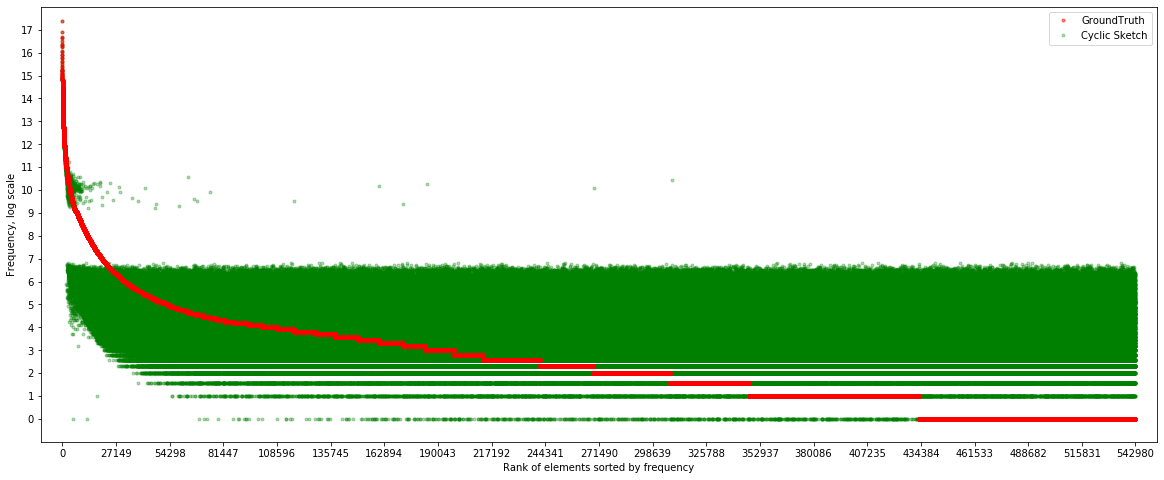

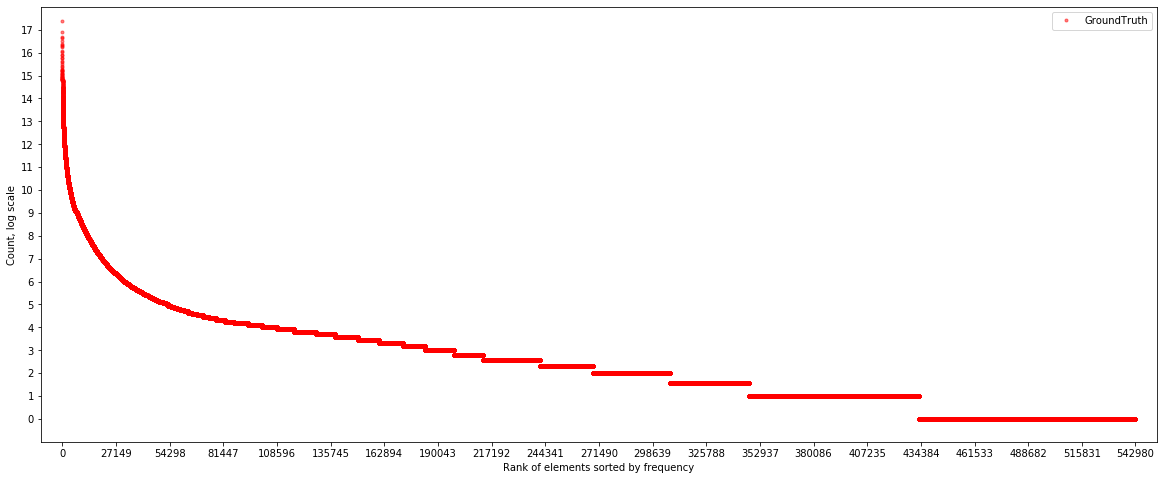

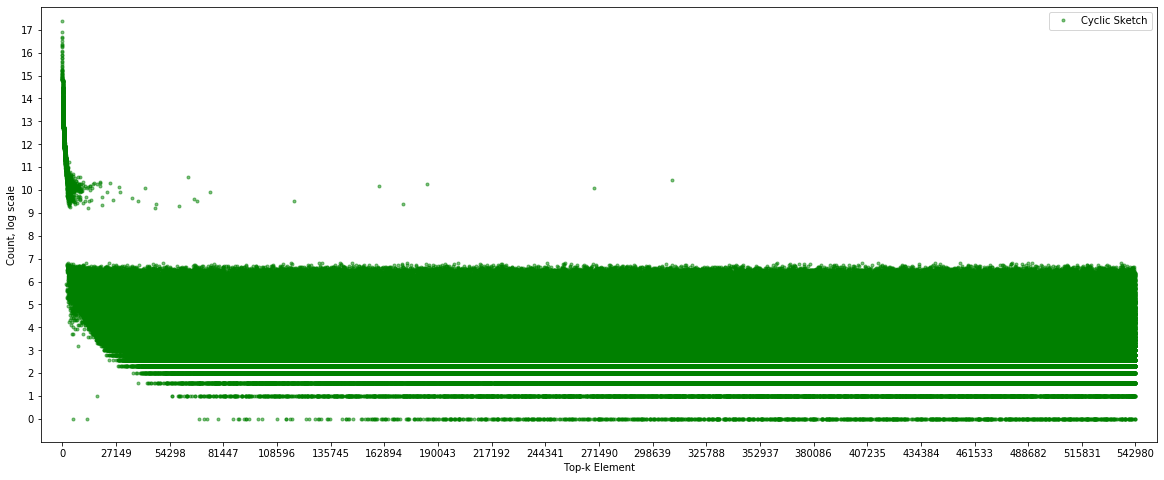

In [5]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=3584
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-4352,Sketch:128*256
Execution time: 183.984 seconds.
Precision:  0.985
Top_dict with 579848 bytes.
Sketch with 131200 bytes.
Sk_head with 33824 bytes.
hyperloglog with 4848 bytes.
Total size 732.1484375 kbytes, 
Find:1009
Top_ARE: 0.0052
Top_AAE: 32.9703
Estimate time:  0.401 seconds.


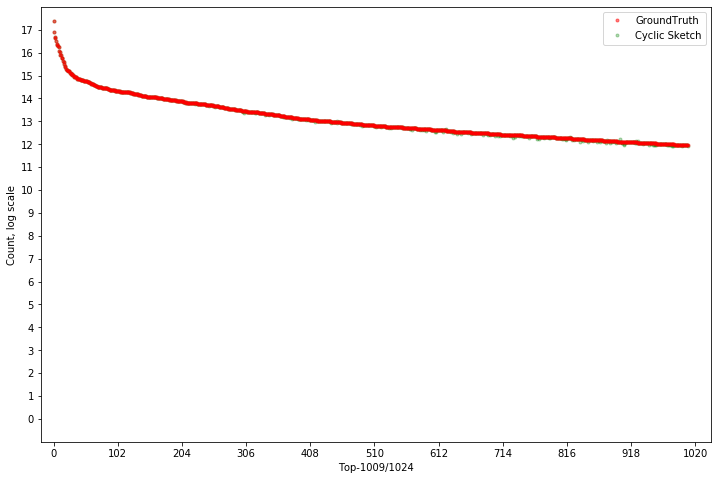

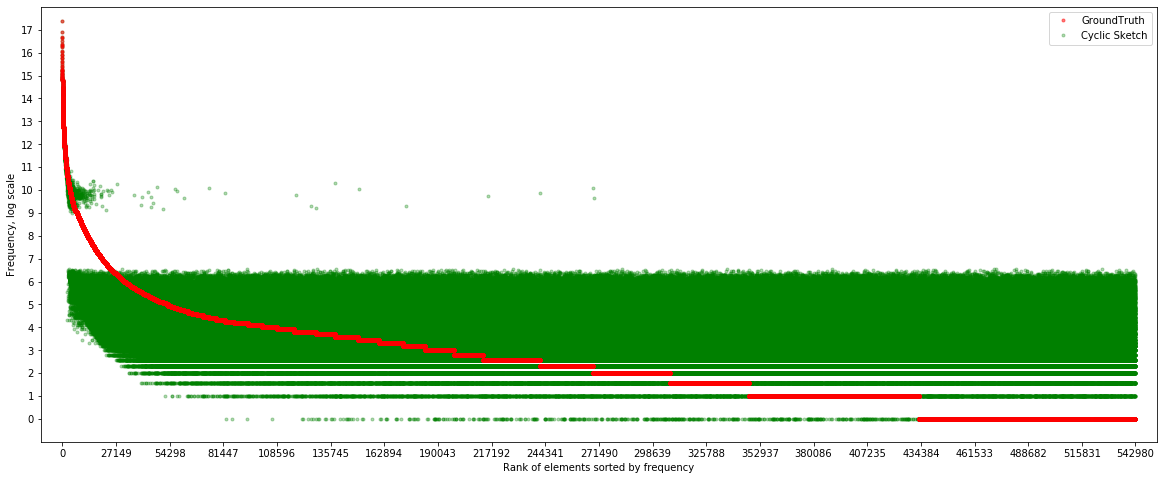

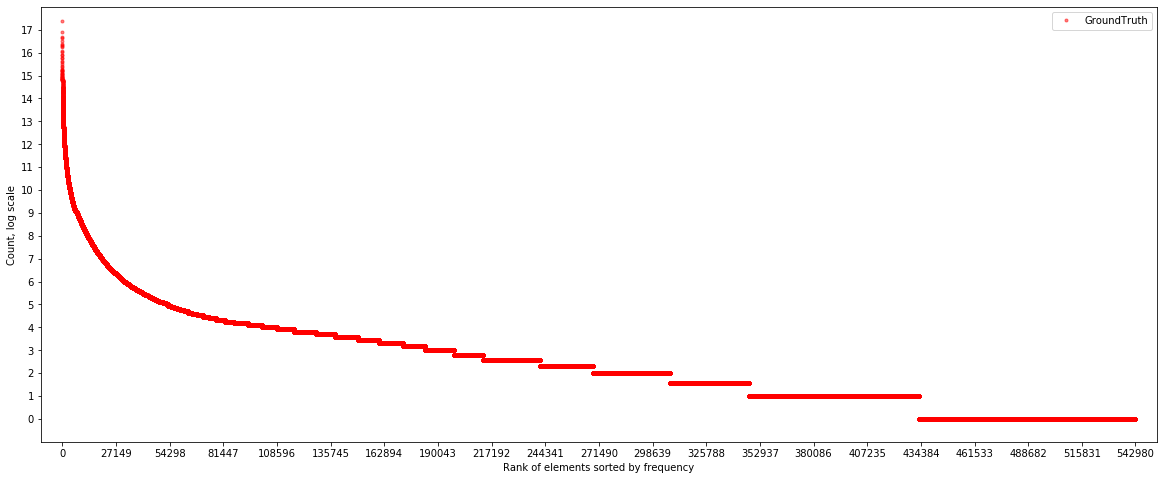

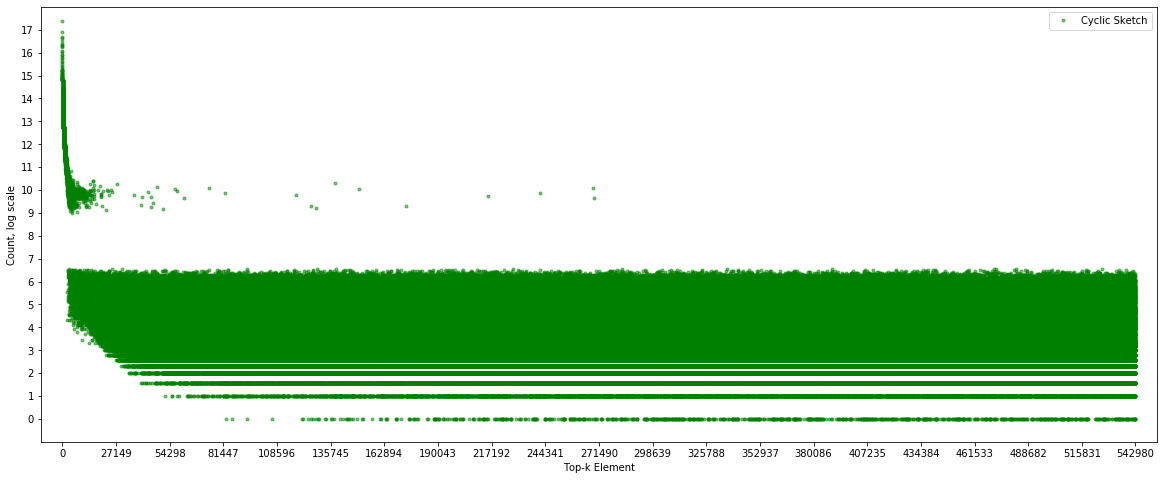

In [6]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=4352
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-5120,Sketch:128*256
Execution time: 180.356 seconds.
Precision:  0.993
Top_dict with 656360 bytes.
Sketch with 131200 bytes.
Sk_head with 33464 bytes.
hyperloglog with 4848 bytes.
Total size 806.515625 kbytes, 
Find:1017
Top_ARE: 0.0042
Top_AAE: 25.8859
Estimate time:  0.384 seconds.


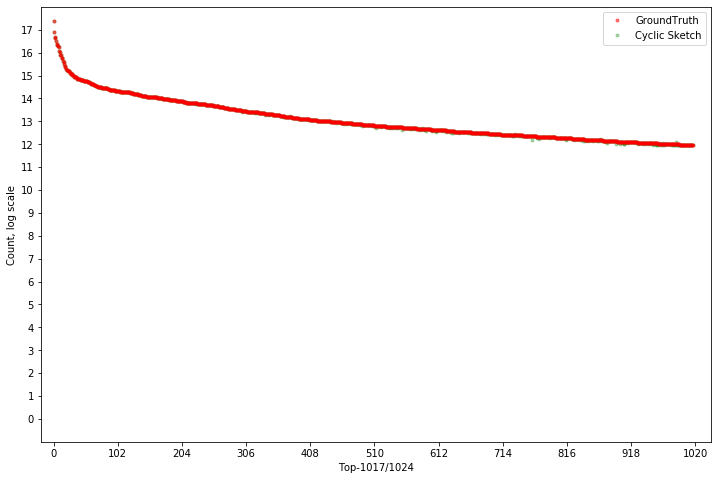

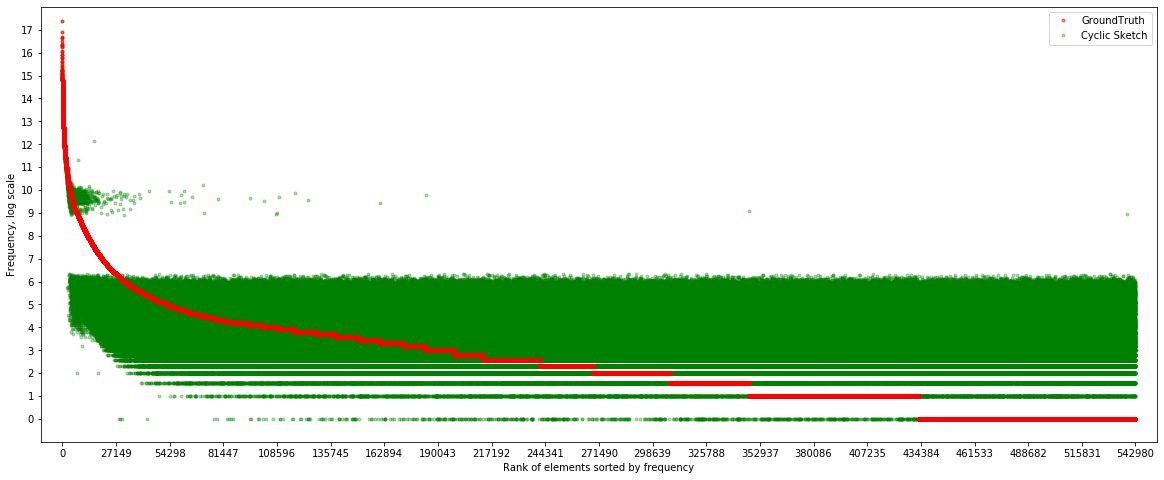

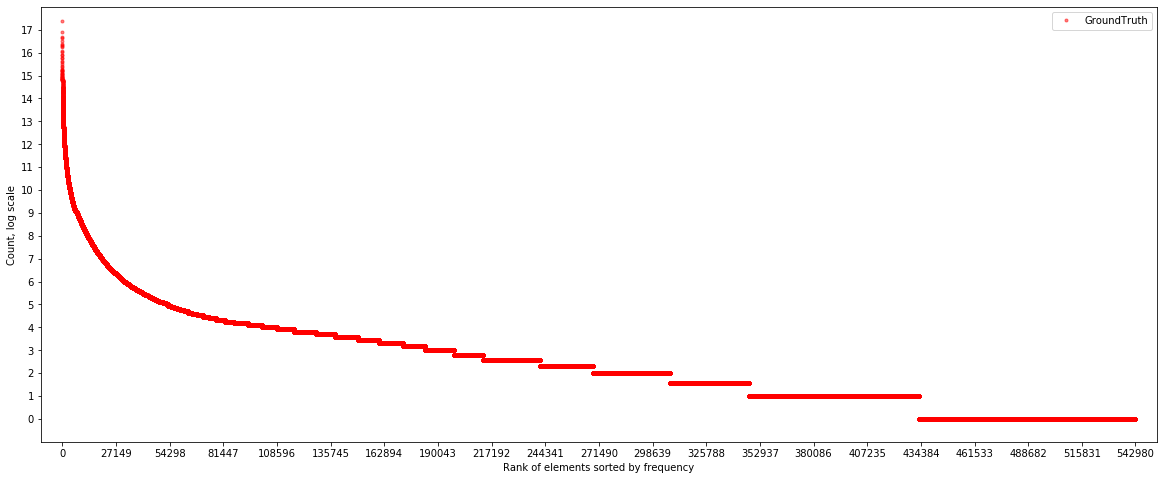

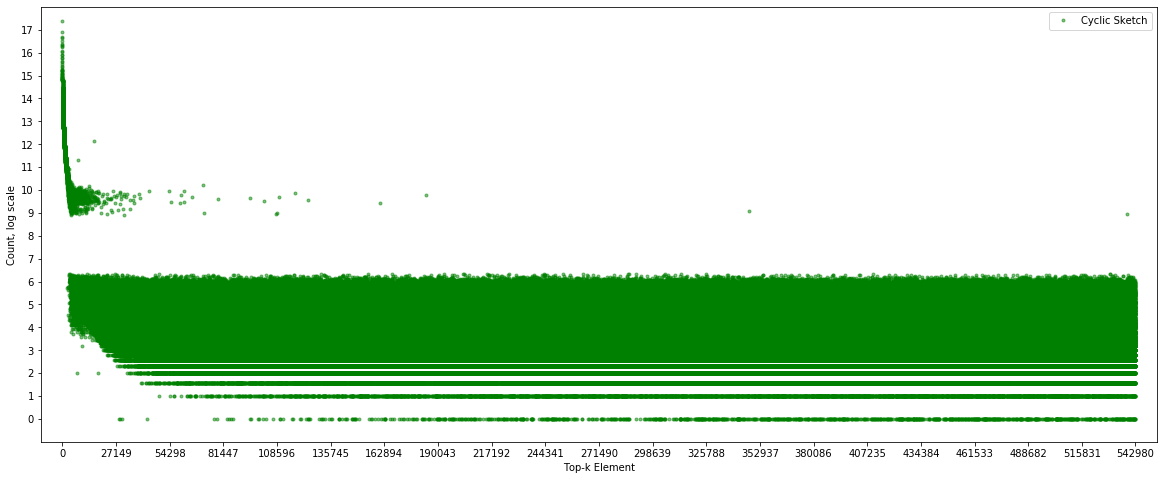

In [7]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=5120
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-5888,Sketch:128*256
Execution time: 175.575 seconds.
Precision:  0.993
Top_dict with 880120 bytes.
Sketch with 131200 bytes.
Sk_head with 33136 bytes.
hyperloglog with 4848 bytes.
Total size 1024.7109375 kbytes, 
Find:1017
Top_ARE: 0.0036
Top_AAE: 22.4916
Estimate time:  0.378 seconds.


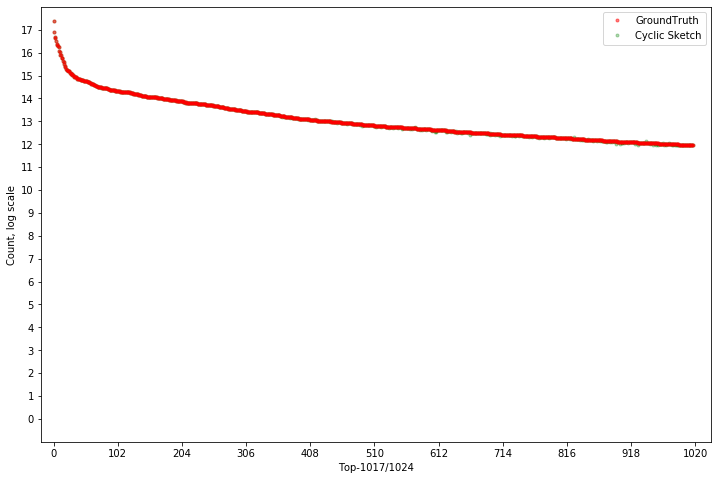

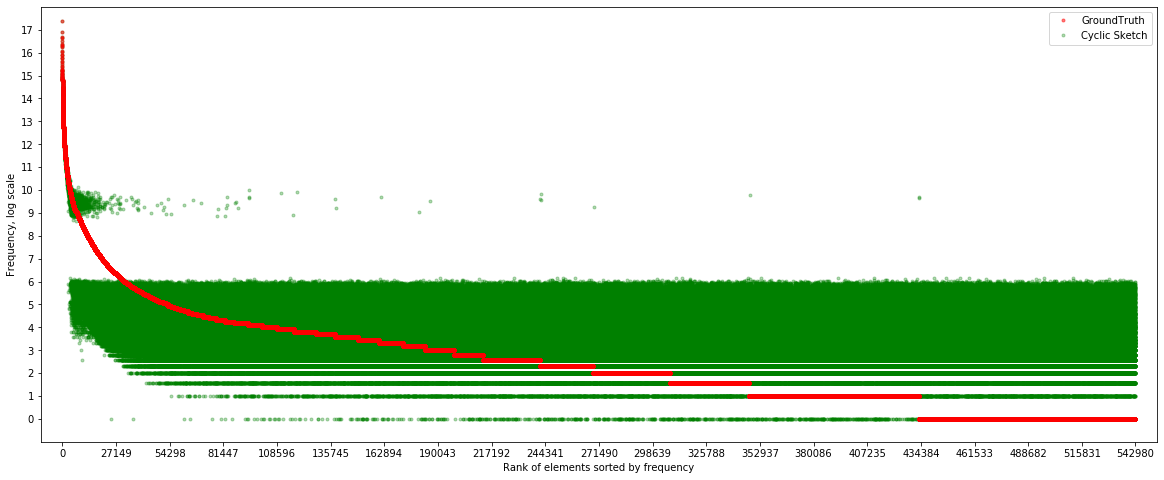

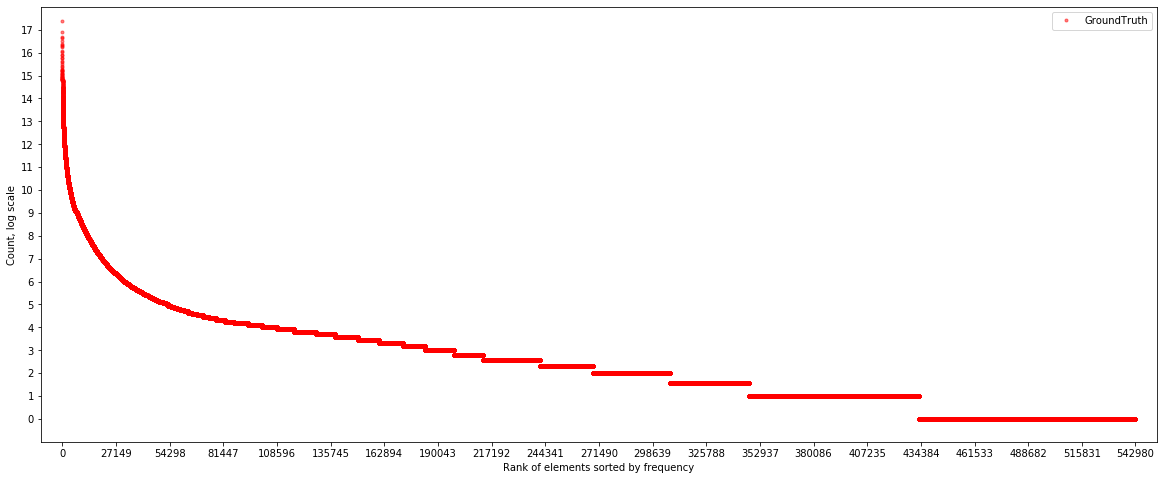

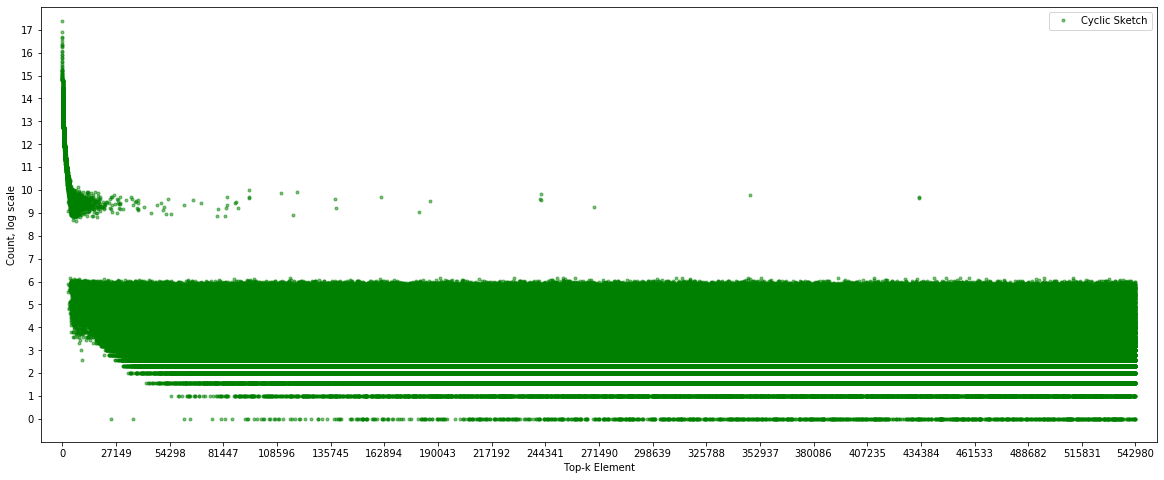

In [8]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=5888
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  



In [11]:
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
#topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
#pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  


'..\\result\\CS\\caida\\add_t\\Top_5888_Sk_128_256\\CS_Sketch_128x256_caida.csv'

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-1024,Sketch:768*256
Execution time: 342.932 seconds.
Precision:  0.932
Top_dict with 138688 bytes.
Sketch with 786560 bytes.
Sk_head with 210272 bytes.
hyperloglog with 4816 bytes.
Total size 1113.609375 kbytes, 
Find:954
Top_ARE: 0.0184
Top_AAE: 121.1908
Estimate time:  0.384 seconds.


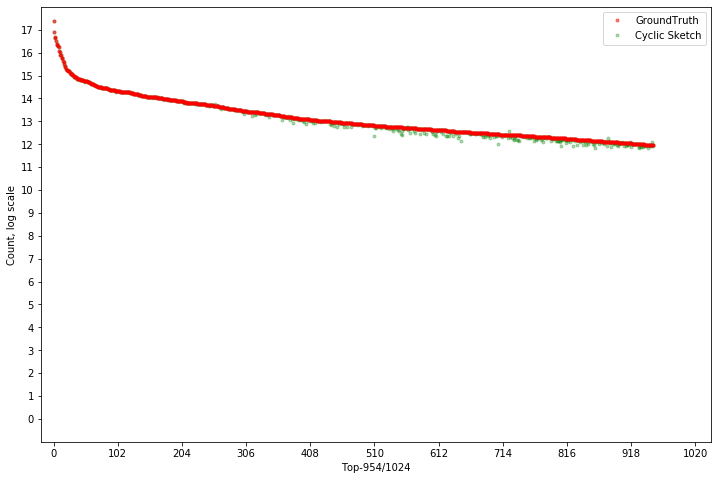

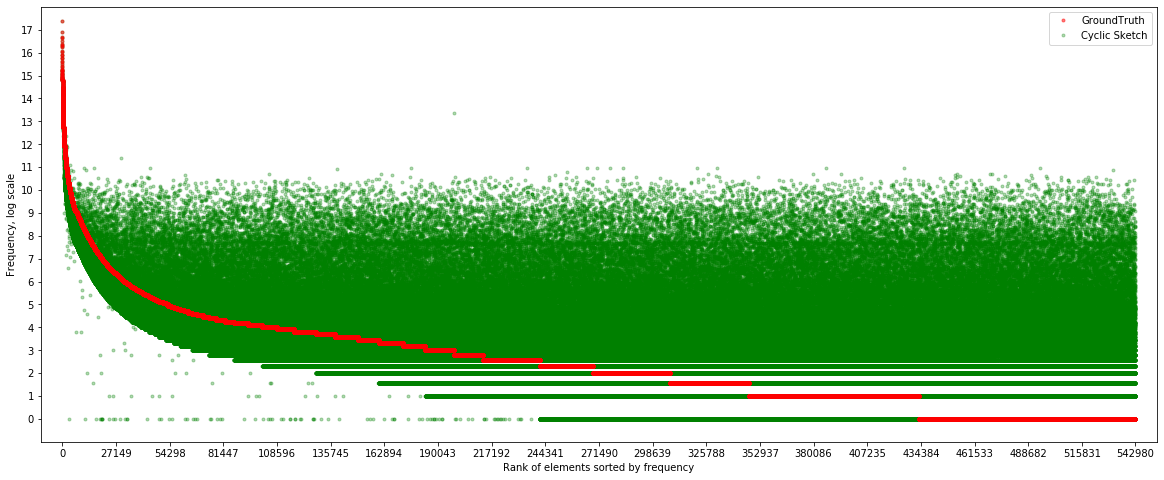

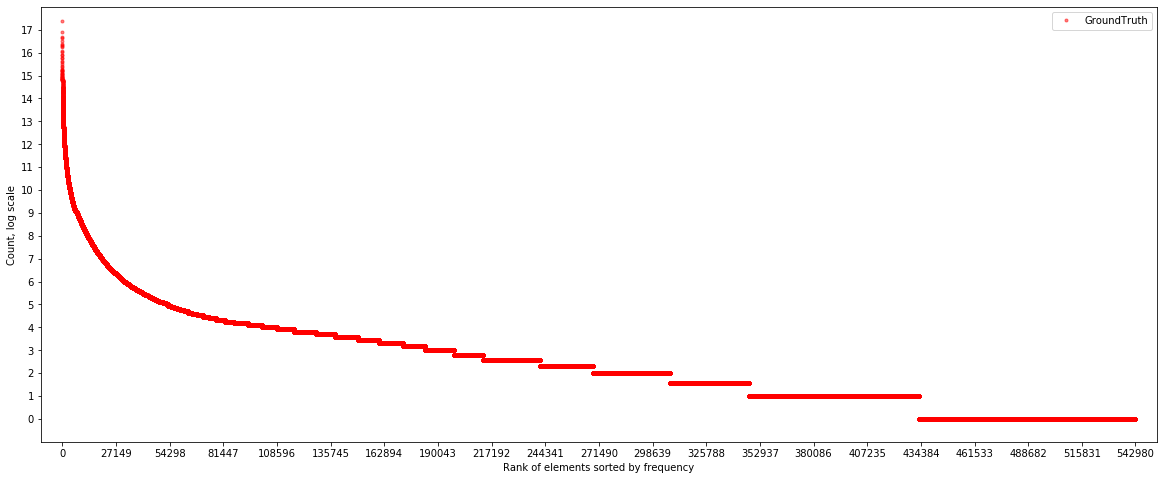

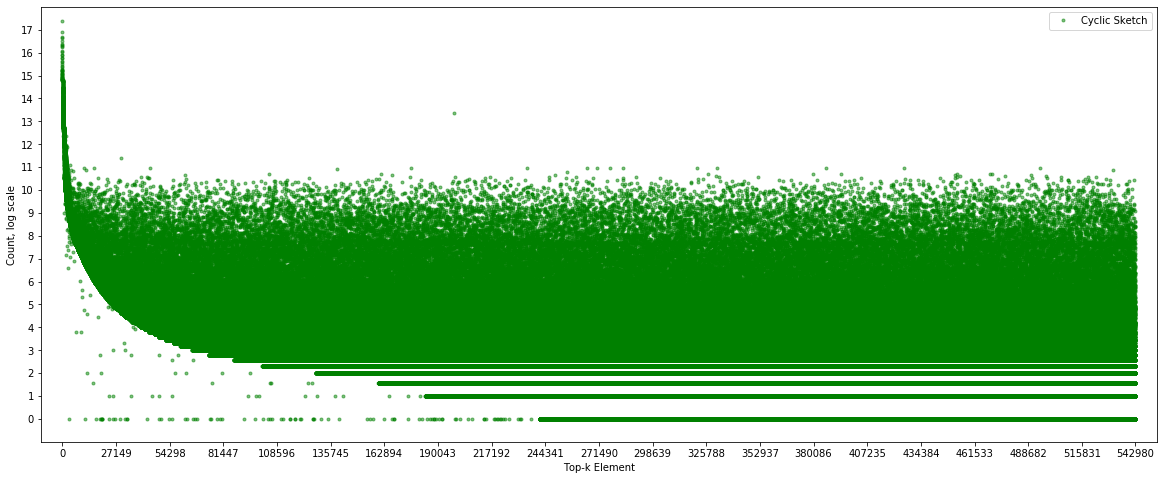

In [1]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=768
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))    

